<a id="top"></a>
# Table of Contents
### 0. [Introduction](#0)
### 1. [Data Engineering](#1)
### 2. [Preprocessing](#2)
### 3. [EDA and Visualization](#3)
### 4. [Modeling](#4)
### 5. [Conclusions](#5)
### 6. [Further Steps](#6)

# 0. Introduction<a id='0'></a>


# 1. Data Ingestion<a id='1'></a>
[(Back to Top)](#top)

In [2]:
# %run /python_scripts/extract_transform_yearly_team_data.py
# %run /python_scripts/gather_years.py
# %run /python_scripts/playoff_ranks.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

# Data Cleaning

In [3]:
# Read in gathered seasonal data
season_stats = pd.read_csv('./yearly_stats.csv', index_col=0)
season_stats.sample(7) # used as pd.head() but shows more variety

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,...,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,Unnamed: 13_level_1_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,Unnamed: 20_level_1_shooting_against,2P_shooting_against_1_2,3P_shooting_against_1_2,Unnamed: 23_level_1_shooting_against,%FGA_shooting_against,Md._shooting_against,Unnamed: 26_level_1_shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,Unnamed: 29_level_1_shooting_against,%3PA_shooting_against,3P%_shooting_against
1263,23.0,Milwaukee Bucks,82.0,19980.0,3050.0,6998.0,0.436,645.0,1813.0,0.356,2405.0,5185.0,0.464,1264.0,1675.0,0.755,965.0,2560.0,3525.0,1740.0,580.0,385.0,1085.0,1823.0,8009.0,...,0.799,0.330,0.110,0.144,0.216,0.201,NaN,0.478,0.582,0.416,0.422,0.390,0.343,NaN,0.494,0.868,NaN,0.043,247.0,NaN,0.266,911.0,NaN,0.261,0.369
1685,24.0,Toronto Raptors,82.0,19805.0,3434.0,7489.0,0.459,880.0,2626.0,0.335,2554.0,4863.0,0.525,1506.0,1922.0,0.784,1043.0,2485.0,3528.0,1961.0,772.0,424.0,956.0,1641.0,9254.0,...,0.604,0.261,0.201,0.090,0.052,0.396,NaN,0.567,0.717,0.453,0.483,0.404,0.374,NaN,0.555,0.865,NaN,0.071,432.0,NaN,0.271,1066.0,NaN,0.289,0.395
1556,19.0,Charlotte Hornets,82.0,19830.0,3297.0,7362.0,0.448,977.0,2783.0,0.351,2320.0,4579.0,0.507,1510.0,1895.0,0.797,814.0,2778.0,3592.0,1905.0,591.0,405.0,1001.0,1550.0,9081.0,...,0.624,0.308,0.143,0.083,0.091,0.376,NaN,0.536,0.669,0.396,0.412,0.416,0.361,NaN,0.522,0.865,NaN,0.065,433.0,NaN,0.289,1169.0,NaN,0.214,0.422
1176,4.0,Los Angeles Lakers,82.0,19780.0,3248.0,6818.0,0.476,662.0,1751.0,0.378,2586.0,5067.0,0.510,1746.0,2270.0,0.769,898.0,2722.0,3620.0,2003.0,654.0,438.0,1156.0,1691.0,8904.0,...,0.782,0.322,0.122,0.111,0.227,0.218,NaN,0.469,0.573,0.388,0.377,0.408,0.362,NaN,0.513,0.854,NaN,0.049,314.0,NaN,0.252,911.0,NaN,0.254,0.386
1374,NaN,Southwest Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,6.0,Minneapolis Lakers,72.0,NaN,2660.0,7192.0,0.370,NaN,NaN,NaN,2660.0,7192.0,0.370,2246.0,3007.0,0.747,NaN,NaN,5189.0,1322.0,NaN,NaN,NaN,1982.0,7566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1475,NaN,League Average,82.0,19828.0,3136.0,6935.0,0.452,698.0,1975.0,0.354,2437.0,4960.0,0.491,1450.0,1916.0,0.757,854.0,2734.0,3588.0,1828.0,643.0,406.0,1179.0,1662.0,8419.0,...,0.715,0.293,0.158,0.103,0.162,0.285,NaN,0.491,0.624,0.396,0.405,0.398,0.354,NaN,0.510,0.836,NaN,0.048,304.0,NaN,0.251,982.0,NaN,0.248,0.377


In [4]:
# Read in gathered playoff data
playoff_finishes = pd.read_csv('./playoff_ranks.csv')
playoff_finishes.sample(7)

,Team,Round Finished,Year
47,Dallas Mavericks,-1,2000
631,Cleveland Cavaliers,-1,2019
154,Indiana Pacers,3,2004
723,Denver Nuggets,5,2023
40,Detroit Pistons,1,2000
221,Denver Nuggets,1,2006
495,Portland Trail Blazers,1,2015


# Preprocessing

In [5]:
# Helper Functions
def show_list(df: pd.DataFrame) -> None:
    '''
    Prints each dataframe's column name, type, and respective index
    Example print:
    0 - Column 1 - object
    1 - Column 2 - float64
    '''
    for i, (key, value) in enumerate(df.dtypes.items()):
        print(i, '-', key,'-', value)

In [6]:
# Change year column to when the season ended Ex: "2021-22" -> int(2022)
season_stats['Playoff_Year'] = [int(x[:-3])+1 for x in season_stats.loc[:, 'Year']]

# Drop data pre 1999 (Shooting stats began being tracked in 1997, we'll give it a couple year buffer)
season_stats = season_stats[season_stats['Playoff_Year']>=1999]

assert season_stats['Playoff_Year'].min() == 1999

In [7]:
# Discrepant team names from csv's
set(season_stats['Team'].unique()).symmetric_difference(playoff_finishes['Team'].unique())

{'Charlotte Bobcats',
 'League Average',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans/Oklahoma City Hornets',
 'Northwest Division',
 'Seattle SuperSonics',
 'Seattle Supersonics',
 'Southeast Division',
 'Southwest Division',
 'Vancouver Grizzlies'}

In [8]:
# Define renaming map
name_mapping = {'Charlotte Bobcats':                    'Charlotte Hornets',
                'New Jersey Nets':                      'Brooklyn Nets',
                'New Orleans Hornets':                  'New Orleans Pelicans',
                'New Orleans/Oklahoma City Hornets':    'New Orleans Pelicans',
                'Seattle SuperSonics':                  'Oklahoma City Thunder',
                'Seattle Supersonics':                  'Oklahoma City Thunder',
                'Vancouver Grizzlies':                  'Memphis Grizzlies',
                }

In [10]:
# Use mapping to rename all organizations to current identities
season_stats['Team'] = season_stats['Team'].replace(name_mapping)
playoff_finishes['Team'] = playoff_finishes['Team'].replace(name_mapping)

set(season_stats['Team'].unique()).symmetric_difference(playoff_finishes['Team'].unique())

{'League Average',
 'Northwest Division',
 'Southeast Division',
 'Southwest Division'}

In [12]:
# Drop non teams
season_stats = season_stats[~season_stats['Team'].isin([
                           'League Average',
                           'Northwest Division', 
                           'Southeast Division', 
                           'Southwest Division', 
                           ])]
# Should be no different team names
assert set(season_stats['Team'].unique()).symmetric_difference(playoff_finishes['Team'].unique()) == set()

In [13]:
# Combine the dataframes
full = pd.merge(season_stats, playoff_finishes, left_on=['Playoff_Year', 'Team'], right_on=['Year', 'Team'])
full

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,...,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,Unnamed: 13_level_1_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,Unnamed: 20_level_1_shooting_against,2P_shooting_against_1_2,3P_shooting_against_1_2,Unnamed: 23_level_1_shooting_against,%FGA_shooting_against,Md._shooting_against,Unnamed: 26_level_1_shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,Unnamed: 29_level_1_shooting_against,%3PA_shooting_against,3P%_shooting_against,Playoff_Year,Round Finished,Year_y
0,1.0,Sacramento Kings,50.0,12200.0,1918.0,4307.0,0.445,290.0,943.0,0.308,1628.0,3364.0,0.484,883.0,1293.0,0.683,706.0,1573.0,2279.0,1129.0,444.0,232.0,842.0,1016.0,5009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
1,2.0,Los Angeles Lakers,50.0,12050.0,1841.0,3935.0,0.468,241.0,685.0,0.352,1600.0,3250.0,0.492,1027.0,1503.0,0.683,619.0,1482.0,2101.0,1095.0,389.0,287.0,754.0,1231.0,4950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,2,1999
2,3.0,Phoenix Suns,50.0,12050.0,1797.0,4004.0,0.449,261.0,702.0,0.372,1536.0,3302.0,0.465,924.0,1215.0,0.760,598.0,1418.0,2016.0,1249.0,444.0,200.0,681.0,1022.0,4779.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
3,4.0,Oklahoma City Thunder,50.0,12100.0,1756.0,3976.0,0.442,309.0,899.0,0.344,1447.0,3077.0,0.470,922.0,1354.0,0.681,676.0,1422.0,2098.0,1087.0,393.0,201.0,765.0,1047.0,4743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,-1,1999
4,5.0,Portland Trail Blazers,50.0,12175.0,1747.0,3956.0,0.442,246.0,675.0,0.364,1501.0,3281.0,0.457,1002.0,1349.0,0.743,646.0,1570.0,2216.0,1073.0,411.0,290.0,771.0,1126.0,4742.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,3,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,26.0,Orlando Magic,82.0,19780.0,3323.0,7074.0,0.470,883.0,2551.0,0.346,2440.0,4523.0,0.539,1607.0,2050.0,0.784,833.0,2713.0,3546.0,1906.0,603.0,382.0,1236.0,1652.0,9136.0,...,0.098,0.064,0.425,NaN,0.567,0.736,0.471,0.478,0.390,0.351,NaN,0.535,0.824,NaN,0.065,426.0,NaN,0.241,1031.0,NaN,0.256,0.401,2023,-1,2023
743,27.0,Charlotte Hornets,82.0,19830.0,3385.0,7413.0,0.457,881.0,2669.0,0.330,2504.0,4744.0,0.528,1447.0,1933.0,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,1661.0,9098.0,...,0.088,0.063,0.380,NaN,0.550,0.677,0.432,0.471,0.446,0.357,NaN,0.502,0.859,NaN,0.065,408.0,NaN,0.284,1154.0,NaN,0.253,0.405,2023,-1,2023
744,28.0,Houston Rockets,82.0,19755.0,3329.0,7287.0,0.457,856.0,2619.0,0.327,2473.0,4668.0,0.530,1567.0,2078.0,0.754,1100.0,2695.0,3795.0,1835.0,600.0,374.0,1332.0,1679.0,9081.0,...,0.082,0.056,0.440,NaN,0.567,0.741,0.480,0.435,0.399,0.374,NaN,0.511,0.817,NaN,0.070,435.0,NaN,0.255,1114.0,NaN,0.216,0.377,2023,-1,2023
745,29.0,Detroit Pistons,82.0,19805.0,3244.0,7140.0,0.454,934.0,2659.0,0.351,2310.0,4481.0,0.516,1623.0,2106.0,0.771,916.0,2564.0,3480.0,1884.0,574.0,308.0,1237.0,1813.0,9045.0,...,0.083,0.060,0.378,NaN,0.568,0.723,0.490,0.421,0.437,0.360,NaN,0.523,0.792,NaN,0.068,439.0,NaN,0.281,1201.0,NaN,0.255,0.387,2023,-1,2023


### Since "Season Total" stats are high correlated to "Per 100 posessions", I'm only keeping the latter plus the Advanced and Shooting stats

### This approach will help to lightly standardize the data, ensuring consistency and simplifying the analysis process

In [24]:
# Filtering out columns
final = full[full.columns[50:]]
final

,Rk_advanced,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%_1,TOV%_1,DRB%,FT/FGA_1,Arena,...,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against,Playoff_Year,Round Finished,Year_y
0,17.0,26.1,27.0,23.0,24.0,26.0,-0.42,-0.47,-0.89,102.7,103.1,-0.4,96.0,0.300,0.219,0.514,0.479,0.147,30.6,0.205,0.471,13.7,67.7,0.176,ARCO Arena (II),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
1,8.0,27.5,31.0,19.0,30.0,20.0,3.02,-0.35,2.68,107.6,104.3,3.3,91.6,0.382,0.174,0.538,0.498,0.141,30.6,0.261,0.468,13.3,70.2,0.267,Great Western Forum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,2,1999
2,11.0,29.3,27.0,23.0,29.0,21.0,2.26,-0.11,2.15,105.8,103.3,2.5,90.0,0.303,0.175,0.526,0.481,0.130,28.4,0.231,0.485,15.4,69.8,0.216,America West Arena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
3,18.0,31.2,25.0,25.0,23.0,27.0,-1.08,-0.35,-1.43,105.0,106.2,-1.2,89.6,0.341,0.226,0.519,0.481,0.143,31.9,0.232,0.489,14.1,68.6,0.213,KeyArena at Seattle Center,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,-1,1999
4,3.0,27.4,35.0,15.0,36.0,14.0,6.36,-0.69,5.67,104.8,97.7,7.1,89.2,0.341,0.171,0.521,0.473,0.145,31.8,0.253,0.445,14.9,71.8,0.233,Rose Garden Arena,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,3,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,24.0,23.1,34.0,48.0,35.0,47.0,-2.56,0.17,-2.39,111.6,114.2,-2.6,99.3,0.290,0.361,0.573,0.532,0.134,23.8,0.227,0.550,13.1,77.7,0.211,Amway Center,...,0.476,14.8,0.575,0.226,0.186,0.098,0.064,0.425,0.567,0.736,0.471,0.478,0.390,0.351,0.535,0.824,0.065,426.0,0.241,1031.0,0.256,0.401,2023,-1,2023
743,27.0,25.3,27.0,55.0,26.0,56.0,-6.24,0.35,-5.89,109.2,115.3,-6.1,100.8,0.261,0.360,0.550,0.516,0.123,23.8,0.195,0.544,12.5,75.5,0.211,Spectrum Center,...,0.477,13.6,0.620,0.280,0.188,0.088,0.063,0.380,0.550,0.677,0.432,0.471,0.446,0.357,0.502,0.859,0.065,408.0,0.284,1154.0,0.253,0.405,2023,-1,2023
744,28.0,22.1,22.0,60.0,23.0,59.0,-7.85,0.24,-7.62,111.4,119.3,-7.9,99.0,0.285,0.359,0.554,0.516,0.140,30.2,0.215,0.564,11.8,75.8,0.218,Toyota Center,...,0.482,14.9,0.560,0.217,0.204,0.082,0.056,0.440,0.567,0.741,0.480,0.435,0.399,0.374,0.511,0.817,0.070,435.0,0.255,1114.0,0.216,0.377,2023,-1,2023
745,29.0,24.1,17.0,65.0,22.0,60.0,-8.22,0.49,-7.73,110.7,118.9,-8.2,99.0,0.295,0.372,0.561,0.520,0.133,24.9,0.227,0.557,11.9,74.0,0.231,Little Caesars Arena,...,0.489,13.6,0.622,0.245,0.234,0.083,0.060,0.378,0.568,0.723,0.490,0.421,0.437,0.360,0.523,0.792,0.068,439.0,0.281,1201.0,0.255,0.387,2023,-1,2023


In [ ]:
# "Unnamed" columns are index columns from csv files
# Rk columns are index columns used by basketball reference
# Advanced Stats: 
# 16-19   ->   Offensive 4 Factors
# 20-23   ->   Defensive 4 Factors
# Shooting stats
# 93-98   ->   % of FGA by distance
# 99-104  ->   FG% by distance
# 105-106 ->   % of FG Ast'd
# 107     ->   %FGA dunks
# 108     ->   Made dunks
# 109     ->   % FGA Layups
# 110     ->   Made Layups
# 111     ->   %3PA from Corner 
# 112     ->   3P% Corner
# 113-114 ->   Heave att & makes
# 120 equivalent to 93 but against (+27)


In [59]:
new_columns = list(final.columns)
new_columns[16:20] = final[final.columns[16:20]].add_suffix('_o4F')
new_columns[20:24] = [x.strip('_1')+'_d4F' for x in new_columns[20:24]]
new_columns

['Rk_advanced',
 'Age',
 'W',
 'L',
 'PW',
 'PL',
 'MOV',
 'SOS',
 'SRS',
 'ORtg',
 'DRtg',
 'NRtg',
 'Pace',
 'FTr',
 '3PAr',
 'TS%',
 'eFG%_o4F',
 'TOV%_o4F',
 'ORB%_o4F',
 'FT/FGA_o4F',
 'eFG%_d4F',
 'TOV%_d4F',
 'DRB%_d4F',
 'FT/FGA_d4F',
 'Arena',
 'Attend.',
 'Attend./G',
 'Unnamed: 0_szn_per100poss',
 'Rk_szn_per100poss',
 'G_szn_per100poss',
 'MP_szn_per100poss',
 'FG_szn_per100poss',
 'FGA_szn_per100poss',
 'FG%_szn_per100poss',
 '3P_szn_per100poss',
 '3PA_szn_per100poss',
 '3P%_szn_per100poss',
 '2P_szn_per100poss',
 '2PA_szn_per100poss',
 '2P%_szn_per100poss',
 'FT_szn_per100poss',
 'FTA_szn_per100poss',
 'FT%_szn_per100poss',
 'ORB_szn_per100poss',
 'DRB_szn_per100poss',
 'TRB_szn_per100poss',
 'AST_szn_per100poss',
 'STL_szn_per100poss',
 'BLK_szn_per100poss',
 'TOV_szn_per100poss',
 'PF_szn_per100poss',
 'PTS_szn_per100poss',
 'Unnamed: 0_szn_per100poss_against',
 'Rk_szn_per100poss_against',
 'G_szn_per100poss_against',
 'MP_szn_per100poss_against',
 'FG_szn_per100poss_a

In [64]:
columns_to_drop = [x for x in final.columns if x.startswith('Rk') or x.startswith('Unnamed')]
# also drop these [x for x in final.columns if x.startswith('Year')]


['Year_x', 'Year_y']

In [25]:
show_list(final)

0 - Rk_advanced - float64
1 - Age - float64
2 - W - float64
3 - L - float64
4 - PW - float64
5 - PL - float64
6 - MOV - float64
7 - SOS - float64
8 - SRS - float64
9 - ORtg - float64
10 - DRtg - float64
11 - NRtg - float64
12 - Pace - float64
13 - FTr - float64
14 - 3PAr - float64
15 - TS% - float64
16 - eFG% - float64
17 - TOV% - float64
18 - ORB% - float64
19 - FT/FGA - float64
20 - eFG%_1 - float64
21 - TOV%_1 - float64
22 - DRB% - float64
23 - FT/FGA_1 - float64
24 - Arena - object
25 - Attend. - float64
26 - Attend./G - float64
27 - Unnamed: 0_szn_per100poss - float64
28 - Rk_szn_per100poss - float64
29 - G_szn_per100poss - float64
30 - MP_szn_per100poss - float64
31 - FG_szn_per100poss - float64
32 - FGA_szn_per100poss - float64
33 - FG%_szn_per100poss - float64
34 - 3P_szn_per100poss - float64
35 - 3PA_szn_per100poss - float64
36 - 3P%_szn_per100poss - float64
37 - 2P_szn_per100poss - float64
38 - 2PA_szn_per100poss - float64
39 - 2P%_szn_per100poss - float64
40 - FT_szn_per100p

In [14]:

assert full.Team.unique().size==30

full.dropna(axis=1, how='all', inplace=True) # Drop fully empty columns
assert (full.notna().sum()==0).any() == False # Throws error if empty columns exist

# Change types to be more appropriate
full['W/L%'] = full['W/L%'].astype('float')
full['TOV%'] = full['TOV%']/100

# Reset index
full.reset_index(inplace=True, drop=True)
full

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,...,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against,Playoff_Year,Round Finished,Year_y
0,1.0,Sacramento Kings,50.0,12200.0,1918.0,4307.0,0.445,290.0,943.0,0.308,1628.0,3364.0,0.484,883.0,1293.0,0.683,706.0,1573.0,2279.0,1129.0,444.0,232.0,842.0,1016.0,5009.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
1,2.0,Los Angeles Lakers,50.0,12050.0,1841.0,3935.0,0.468,241.0,685.0,0.352,1600.0,3250.0,0.492,1027.0,1503.0,0.683,619.0,1482.0,2101.0,1095.0,389.0,287.0,754.0,1231.0,4950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,2,1999
2,3.0,Phoenix Suns,50.0,12050.0,1797.0,4004.0,0.449,261.0,702.0,0.372,1536.0,3302.0,0.465,924.0,1215.0,0.760,598.0,1418.0,2016.0,1249.0,444.0,200.0,681.0,1022.0,4779.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1,1999
3,4.0,Oklahoma City Thunder,50.0,12100.0,1756.0,3976.0,0.442,309.0,899.0,0.344,1447.0,3077.0,0.470,922.0,1354.0,0.681,676.0,1422.0,2098.0,1087.0,393.0,201.0,765.0,1047.0,4743.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,-1,1999
4,5.0,Portland Trail Blazers,50.0,12175.0,1747.0,3956.0,0.442,246.0,675.0,0.364,1501.0,3281.0,0.457,1002.0,1349.0,0.743,646.0,1570.0,2216.0,1073.0,411.0,290.0,771.0,1126.0,4742.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,3,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,26.0,Orlando Magic,82.0,19780.0,3323.0,7074.0,0.470,883.0,2551.0,0.346,2440.0,4523.0,0.539,1607.0,2050.0,0.784,833.0,2713.0,3546.0,1906.0,603.0,382.0,1236.0,1652.0,9136.0,...,0.476,14.8,0.575,0.226,0.186,0.098,0.064,0.425,0.567,0.736,0.471,0.478,0.390,0.351,0.535,0.824,0.065,426.0,0.241,1031.0,0.256,0.401,2023,-1,2023
743,27.0,Charlotte Hornets,82.0,19830.0,3385.0,7413.0,0.457,881.0,2669.0,0.330,2504.0,4744.0,0.528,1447.0,1933.0,0.749,901.0,2751.0,3652.0,2062.0,634.0,425.0,1164.0,1661.0,9098.0,...,0.477,13.6,0.620,0.280,0.188,0.088,0.063,0.380,0.550,0.677,0.432,0.471,0.446,0.357,0.502,0.859,0.065,408.0,0.284,1154.0,0.253,0.405,2023,-1,2023
744,28.0,Houston Rockets,82.0,19755.0,3329.0,7287.0,0.457,856.0,2619.0,0.327,2473.0,4668.0,0.530,1567.0,2078.0,0.754,1100.0,2695.0,3795.0,1835.0,600.0,374.0,1332.0,1679.0,9081.0,...,0.482,14.9,0.560,0.217,0.204,0.082,0.056,0.440,0.567,0.741,0.480,0.435,0.399,0.374,0.511,0.817,0.070,435.0,0.255,1114.0,0.216,0.377,2023,-1,2023
745,29.0,Detroit Pistons,82.0,19805.0,3244.0,7140.0,0.454,934.0,2659.0,0.351,2310.0,4481.0,0.516,1623.0,2106.0,0.771,916.0,2564.0,3480.0,1884.0,574.0,308.0,1237.0,1813.0,9045.0,...,0.489,13.6,0.622,0.245,0.234,0.083,0.060,0.378,0.568,0.723,0.490,0.421,0.437,0.360,0.523,0.792,0.068,439.0,0.281,1201.0,0.255,0.387,2023,-1,2023


In [15]:
full.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       ...
       '3P_shooting_against_1_2', '%FGA_shooting_against',
       'Md._shooting_against', '%FGA_shooting_against_1',
       'Md._shooting_against_1', '%3PA_shooting_against',
       '3P%_shooting_against', 'Playoff_Year', 'Round Finished', 'Year_y'],
      dtype='object', length=193)

# 2. EDA<a id='2'></a>
[(Back to Top)](#top)

In [88]:
winners = full.query('`Round Finished` == 5')
winners

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,...,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against,Playoff_Year,Round Finished,Year_y
5,6.0,Los Angeles Lakers,82.0,19805.0,3137.0,6836.0,0.459,344.0,1047.0,0.329,2793.0,5789.0,0.482,1649.0,2368.0,0.696,1117.0,2738.0,3855.0,1921.0,613.0,534.0,1143.0,1841.0,8267.0,...,0.416,13.4,0.833,0.154,0.162,0.281,0.235,0.167,0.434,0.914,0.345,0.239,0.413,0.326,0.526,0.809,0.038,241.0,NaN,NaN,0.176,0.393,2000,5,2000
31,3.0,Los Angeles Lakers,82.0,19905.0,3109.0,6685.0,0.465,439.0,1275.0,0.344,2670.0,5410.0,0.494,1594.0,2333.0,0.683,1085.0,2583.0,3668.0,1888.0,564.0,490.0,1184.0,1872.0,8251.0,...,0.438,12.4,0.829,0.250,0.161,0.177,0.240,0.171,0.455,0.627,0.345,0.395,0.394,0.354,0.518,0.794,0.031,193.0,NaN,NaN,0.189,0.398,2001,5,2001
60,3.0,Los Angeles Lakers,82.0,19780.0,3150.0,6840.0,0.461,510.0,1439.0,0.354,2640.0,5401.0,0.489,1494.0,2138.0,0.699,1022.0,2607.0,3629.0,1882.0,625.0,478.0,1040.0,1823.0,8304.0,...,0.424,12.4,0.814,0.263,0.152,0.166,0.233,0.186,0.448,0.626,0.333,0.378,0.373,0.317,0.532,0.820,0.048,304.0,0.190,728.0,0.194,0.369,2002,5,2002
98,12.0,San Antonio Spurs,82.0,19830.0,2908.0,6297.0,0.462,449.0,1270.0,0.354,2459.0,5027.0,0.489,1591.0,2194.0,0.725,939.0,2556.0,3495.0,1636.0,629.0,529.0,1295.0,1672.0,7856.0,...,0.427,11.7,0.844,0.268,0.192,0.168,0.218,0.156,0.443,0.572,0.374,0.384,0.391,0.339,0.510,0.788,0.044,257.0,0.221,738.0,0.240,0.324,2003,5,2003
139,24.0,Detroit Pistons,82.0,19780.0,2747.0,6314.0,0.435,333.0,968.0,0.344,2414.0,5346.0,0.452,1561.0,2074.0,0.753,1014.0,2492.0,3506.0,1702.0,659.0,570.0,1241.0,1664.0,7388.0,...,0.413,12.0,0.815,0.305,0.123,0.147,0.240,0.185,0.438,0.544,0.387,0.377,0.367,0.302,0.554,0.843,0.041,220.0,0.238,741.0,0.260,0.349,2004,5,2004
162,18.0,San Antonio Spurs,82.0,19805.0,2923.0,6450.0,0.453,507.0,1395.0,0.363,2416.0,5055.0,0.478,1535.0,2120.0,0.724,987.0,2489.0,3476.0,1771.0,613.0,543.0,1126.0,1717.0,7888.0,...,0.426,11.1,0.861,0.290,0.200,0.159,0.213,0.139,0.436,0.576,0.331,0.389,0.381,0.367,0.476,0.768,0.045,251.0,0.247,766.0,0.243,0.393,2005,5,2005
180,6.0,Miami Heat,82.0,19755.0,3039.0,6355.0,0.478,497.0,1441.0,0.345,2542.0,4914.0,0.517,1616.0,2310.0,0.700,858.0,2675.0,3533.0,1692.0,522.0,442.0,1186.0,1871.0,8191.0,...,0.440,12.7,0.792,0.277,0.134,0.118,0.262,0.208,0.461,0.583,0.399,0.401,0.389,0.361,0.511,0.773,0.052,299.0,0.204,670.0,0.276,0.405,2006,5,2006
218,14.0,San Antonio Spurs,82.0,19780.0,2999.0,6328.0,0.474,595.0,1561.0,0.381,2404.0,4767.0,0.504,1486.0,1980.0,0.751,761.0,2577.0,3338.0,1814.0,587.0,417.0,1137.0,1588.0,8079.0,...,0.443,11.5,0.830,0.301,0.175,0.144,0.210,0.170,0.465,0.572,0.395,0.397,0.415,0.334,0.447,0.821,0.036,206.0,0.257,858.0,0.268,0.376,2007,5,2007
245,11.0,Boston Celtics,82.0,19755.0,2986.0,6286.0,0.475,596.0,1564.0,0.381,2390.0,4722.0,0.506,1677.0,2176.0,0.771,830.0,2615.0,3445.0,1833.0,696.0,379.0,1246.0,1864.0,8245.0,...,0.419,13.3,0.758,0.266,0.137,0.117,0.237,0.242,0.452,0.604,0.374,0.389,0.357,0.316,0.516,0.862,0.041,239.0,0.216,763.0,0.259,0.340,2008,5,2008
267,3.0,Los Angeles Lakers,82.0,19780.0,3307.0,6981.0,0.474,547.0,1516.0,0.361,2760.0,5465.0,0.505,1607.0,2087.0,0.770,1015.0,2587.0,3602.0,1908.0,718.0,420.0,1103.0,1698.0,8768.0,...,0.447,12.4,0.751,0.339,0.096,0.100,0.216,0.249,0.481,0.597,0.395,0.372,0.386,0.345,0.547,0.865,0.059,372.0,0.263,952.0,0.321,0.380,2009,5,2009


In [11]:
cols_to_use = [0,136,1,50,51,55,56,57,60,61,63,64,65,66,67,69,70,71,98,99,189]

# 3. EDA and Visualization<a id='3'></a>
[(Back to Top)](#top)

In [226]:
winners = full.query('`Round Finished` == 5')
winners.head(10)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,...,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,2P_shooting_against_1,0-3_shooting_against_1,3-10_shooting_against_1,10-16_shooting_against_1,16-3P_shooting_against_1,3P_shooting_against_1,2P_shooting_against_1_2,3P_shooting_against_1_2,%FGA_shooting_against,Md._shooting_against,%FGA_shooting_against_1,Md._shooting_against_1,%3PA_shooting_against,3P%_shooting_against,Playoff_Year,Round Finished,Year_y
5,6.0,Los Angeles Lakers,82.0,19805.0,3137.0,6836.0,0.459,344.0,1047.0,0.329,2793.0,5789.0,0.482,1649.0,2368.0,0.696,1117.0,2738.0,3855.0,1921.0,613.0,534.0,1143.0,1841.0,8267.0,...,0.416,13.4,0.833,0.154,0.162,0.281,0.235,0.167,0.434,0.914,0.345,0.239,0.413,0.326,0.526,0.809,0.038,241.0,NaN,NaN,0.176,0.393,2000,5,2000
31,3.0,Los Angeles Lakers,82.0,19905.0,3109.0,6685.0,0.465,439.0,1275.0,0.344,2670.0,5410.0,0.494,1594.0,2333.0,0.683,1085.0,2583.0,3668.0,1888.0,564.0,490.0,1184.0,1872.0,8251.0,...,0.438,12.4,0.829,0.250,0.161,0.177,0.240,0.171,0.455,0.627,0.345,0.395,0.394,0.354,0.518,0.794,0.031,193.0,NaN,NaN,0.189,0.398,2001,5,2001
60,3.0,Los Angeles Lakers,82.0,19780.0,3150.0,6840.0,0.461,510.0,1439.0,0.354,2640.0,5401.0,0.489,1494.0,2138.0,0.699,1022.0,2607.0,3629.0,1882.0,625.0,478.0,1040.0,1823.0,8304.0,...,0.424,12.4,0.814,0.263,0.152,0.166,0.233,0.186,0.448,0.626,0.333,0.378,0.373,0.317,0.532,0.820,0.048,304.0,0.190,728.0,0.194,0.369,2002,5,2002
98,12.0,San Antonio Spurs,82.0,19830.0,2908.0,6297.0,0.462,449.0,1270.0,0.354,2459.0,5027.0,0.489,1591.0,2194.0,0.725,939.0,2556.0,3495.0,1636.0,629.0,529.0,1295.0,1672.0,7856.0,...,0.427,11.7,0.844,0.268,0.192,0.168,0.218,0.156,0.443,0.572,0.374,0.384,0.391,0.339,0.510,0.788,0.044,257.0,0.221,738.0,0.240,0.324,2003,5,2003
139,24.0,Detroit Pistons,82.0,19780.0,2747.0,6314.0,0.435,333.0,968.0,0.344,2414.0,5346.0,0.452,1561.0,2074.0,0.753,1014.0,2492.0,3506.0,1702.0,659.0,570.0,1241.0,1664.0,7388.0,...,0.413,12.0,0.815,0.305,0.123,0.147,0.240,0.185,0.438,0.544,0.387,0.377,0.367,0.302,0.554,0.843,0.041,220.0,0.238,741.0,0.260,0.349,2004,5,2004
162,18.0,San Antonio Spurs,82.0,19805.0,2923.0,6450.0,0.453,507.0,1395.0,0.363,2416.0,5055.0,0.478,1535.0,2120.0,0.724,987.0,2489.0,3476.0,1771.0,613.0,543.0,1126.0,1717.0,7888.0,...,0.426,11.1,0.861,0.290,0.200,0.159,0.213,0.139,0.436,0.576,0.331,0.389,0.381,0.367,0.476,0.768,0.045,251.0,0.247,766.0,0.243,0.393,2005,5,2005
180,6.0,Miami Heat,82.0,19755.0,3039.0,6355.0,0.478,497.0,1441.0,0.345,2542.0,4914.0,0.517,1616.0,2310.0,0.700,858.0,2675.0,3533.0,1692.0,522.0,442.0,1186.0,1871.0,8191.0,...,0.440,12.7,0.792,0.277,0.134,0.118,0.262,0.208,0.461,0.583,0.399,0.401,0.389,0.361,0.511,0.773,0.052,299.0,0.204,670.0,0.276,0.405,2006,5,2006
218,14.0,San Antonio Spurs,82.0,19780.0,2999.0,6328.0,0.474,595.0,1561.0,0.381,2404.0,4767.0,0.504,1486.0,1980.0,0.751,761.0,2577.0,3338.0,1814.0,587.0,417.0,1137.0,1588.0,8079.0,...,0.443,11.5,0.830,0.301,0.175,0.144,0.210,0.170,0.465,0.572,0.395,0.397,0.415,0.334,0.447,0.821,0.036,206.0,0.257,858.0,0.268,0.376,2007,5,2007
245,11.0,Boston Celtics,82.0,19755.0,2986.0,6286.0,0.475,596.0,1564.0,0.381,2390.0,4722.0,0.506,1677.0,2176.0,0.771,830.0,2615.0,3445.0,1833.0,696.0,379.0,1246.0,1864.0,8245.0,...,0.419,13.3,0.758,0.266,0.137,0.117,0.237,0.242,0.452,0.604,0.374,0.389,0.357,0.316,0.516,0.862,0.041,239.0,0.216,763.0,0.259,0.340,2008,5,2008
267,3.0,Los Angeles Lakers,82.0,19780.0,3307.0,6981.0,0.474,547.0,1516.0,0.361,2760.0,5465.0,0.505,1607.0,2087.0,0.770,1015.0,2587.0,3602.0,1908.0,718.0,420.0,1103.0,1698.0,8768.0,...,0.447,12.4,0.751,0.339,0.096,0.100,0.216,0.249,0.481,0.597,0.395,0.372,0.386,0.345,0.547,0.865,0.059,372.0,0.263,952.0,0.321,0.380,2009,5,2009


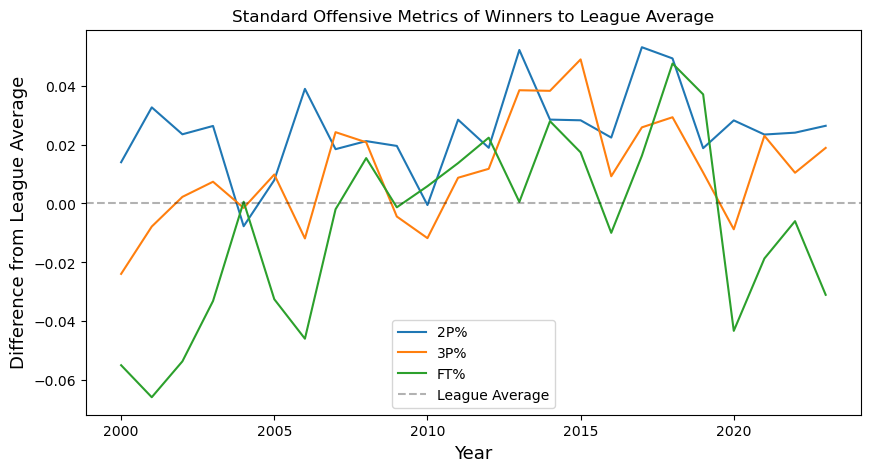

In [227]:
plt.figure(figsize=(10, 5))
x = winners['Playoff_Year']

stats = ['2P%', '3P%', 'FT%']
columns_to_plot = [s +'_szn_per100poss' for s in stats]

y1 = winners[columns_to_plot]
y2 = full[columns_to_plot+['Playoff_Year']].groupby(by='Playoff_Year').agg('mean')


plt.plot(x, y1.reset_index(drop=True)-y2.reset_index(drop=True), label=stats)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Average')

plt.title('Standard Offensive Metrics of Winners to League Average')
plt.ylabel('Difference from League Average', size=13)
plt.xlabel('Year', size=13)
plt.legend()
plt.show()

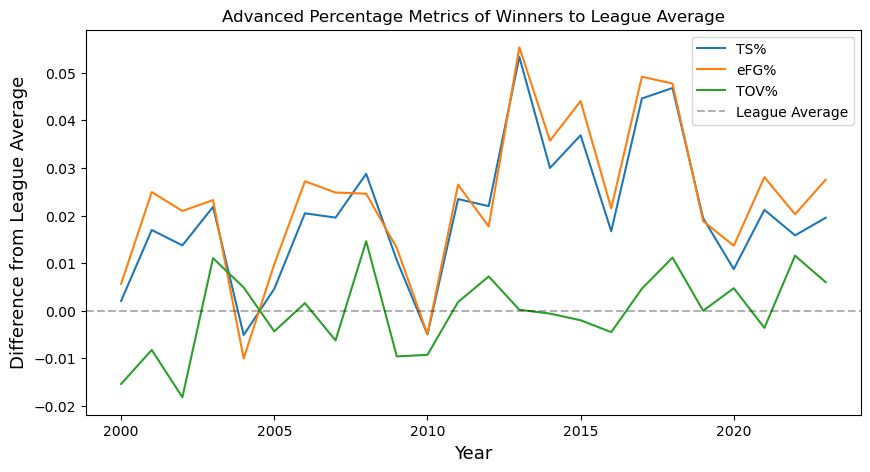

In [234]:
plt.figure(figsize=(10, 5))
x = winners['Playoff_Year']

stats = ['TS%', 'eFG%', 'TOV%']
columns_to_plot = [s + '' for s in stats]


y1 = winners[columns_to_plot]
y2 = full[columns_to_plot+['Playoff_Year']].groupby(by='Playoff_Year').agg('mean')


plt.plot(x, y1.reset_index(drop=True) -
         y2.reset_index(drop=True), label=stats)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Average',)

plt.title('Advanced Percentage Metrics of Winners to League Average')
plt.ylabel('Difference from League Average', size=13)
plt.xlabel('Year', size=13)
plt.legend()
plt.show()

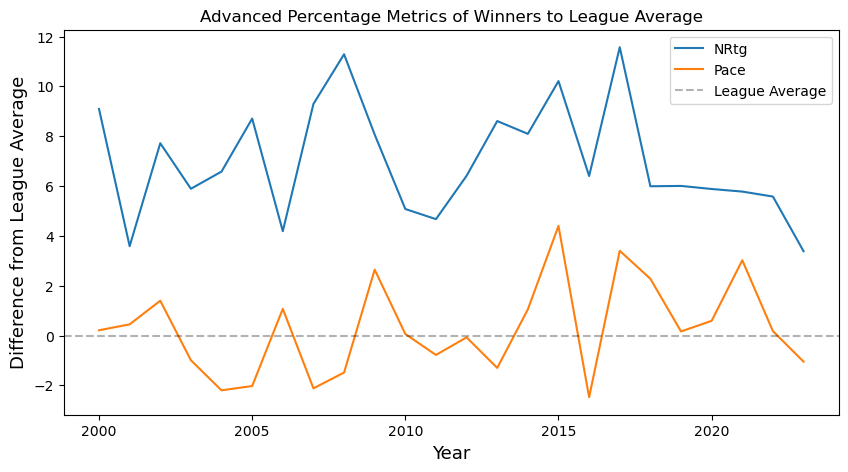

In [236]:
plt.figure(figsize=(10, 5))
x = winners['Playoff_Year']

stats = ['NRtg', 'Pace']
columns_to_plot = [s + '' for s in stats]


y1 = winners[columns_to_plot]
y2 = full[columns_to_plot+['Playoff_Year']].groupby(by='Playoff_Year').agg('mean')


plt.plot(x, y1.reset_index(drop=True) -
         y2.reset_index(drop=True), label=stats)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Average',)

plt.title('Advanced Percentage Metrics of Winners to League Average')
plt.ylabel('Difference from League Average', size=13)
plt.xlabel('Year', size=13)
plt.legend()
plt.show()

In [237]:
show_list(full)

0 - Rk - float64
1 - Team - object
2 - G - float64
3 - MP - float64
4 - FG - float64
5 - FGA - float64
6 - FG% - float64
7 - 3P - float64
8 - 3PA - float64
9 - 3P% - float64
10 - 2P - float64
11 - 2PA - float64
12 - 2P% - float64
13 - FT - float64
14 - FTA - float64
15 - FT% - float64
16 - ORB - float64
17 - DRB - float64
18 - TRB - float64
19 - AST - float64
20 - STL - float64
21 - BLK - float64
22 - TOV - float64
23 - PF - float64
24 - PTS - float64
25 - Unnamed: 0_szn_totals_against - float64
26 - Rk_szn_totals_against - float64
27 - G_szn_totals_against - float64
28 - MP_szn_totals_against - float64
29 - FG_szn_totals_against - float64
30 - FGA_szn_totals_against - float64
31 - FG%_szn_totals_against - float64
32 - 3P_szn_totals_against - float64
33 - 3PA_szn_totals_against - float64
34 - 3P%_szn_totals_against - float64
35 - 2P_szn_totals_against - float64
36 - 2PA_szn_totals_against - float64
37 - 2P%_szn_totals_against - float64
38 - FT_szn_totals_against - float64
39 - FTA_szn_

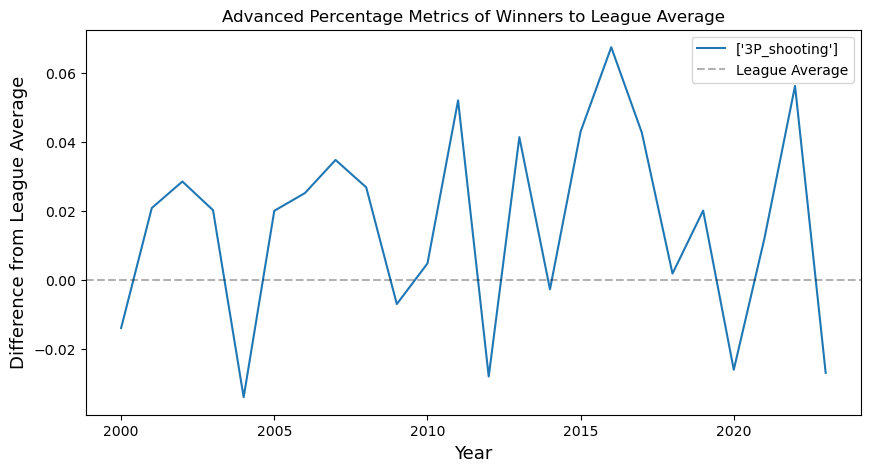

In [240]:
plt.figure(figsize=(10, 5))
x = winners['Playoff_Year']

stats = ['3P_shooting']
columns_to_plot = [s + '' for s in stats]


y1 = winners[columns_to_plot]
y2 = full[columns_to_plot+['Playoff_Year']].groupby(by='Playoff_Year').agg('mean')


plt.plot(x, y1.reset_index(drop=True) -
         y2.reset_index(drop=True), label=stats)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Average',)

plt.title('Advanced Percentage Metrics of Winners to League Average')
plt.ylabel('Difference from League Average', size=13)
plt.xlabel('Year', size=13)
plt.legend()
plt.show()

In [261]:
x = 807
len(str(x))

3

In [232]:
plt.figure(figsize=(9,4))
x = winners['Year']
y2 = winners['SRS']

plt.plot(x, y2,label = 'Difference in Turnover%', color='Orange')
#plt.plot(x, y3, label = 'Difference in EFG%', color='Red')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.legend()
plt.show()

KeyError: 'Year'

<Figure size 900x400 with 0 Axes>

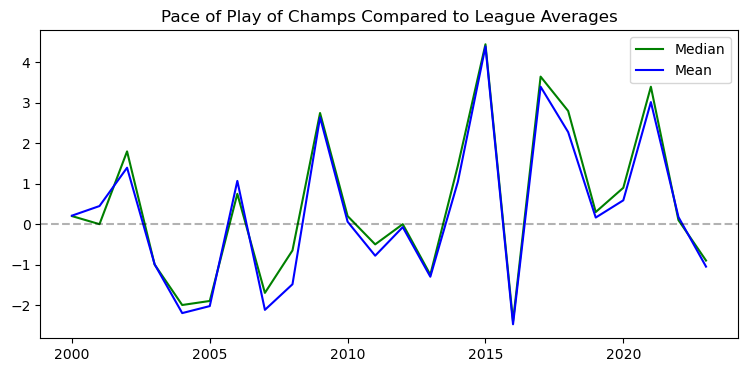

In [13]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['Pace']
y2 = modeling[['Pace', 'Year']].groupby(by='Year').agg(['mean', 'median'])['Pace']

#y2 = winners['eFG%']-winners['eFG%_1']

plt.plot(x, np.array(y1)-np.array(y2['median']), color='green', label='Median')
plt.plot(x, np.array(y1)-np.array(y2['mean']), color='blue', label='Mean')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Pace of Play of Champs Compared to League Averages')

plt.legend()
plt.show()

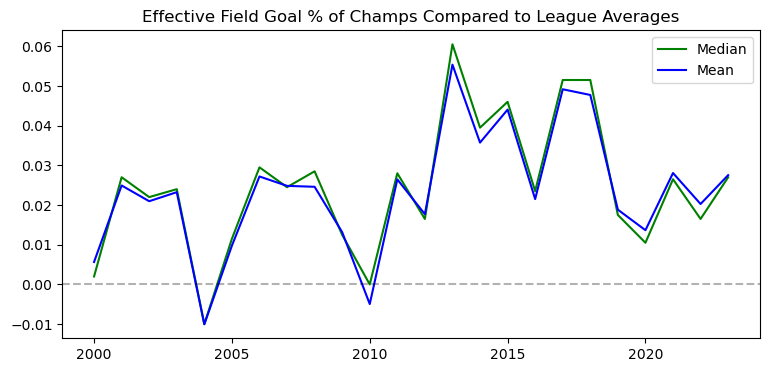

In [14]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['eFG%']
y2 = modeling[['eFG%', 'Year']].groupby(by='Year').agg(['mean', 'median'])['eFG%']

#y2 = winners['eFG%']-winners['eFG%_1']

plt.plot(x, np.array(y1)-np.array(y2['median']), color='green', label='Median')
plt.plot(x, np.array(y1)-np.array(y2['mean']), color='blue', label='Mean')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

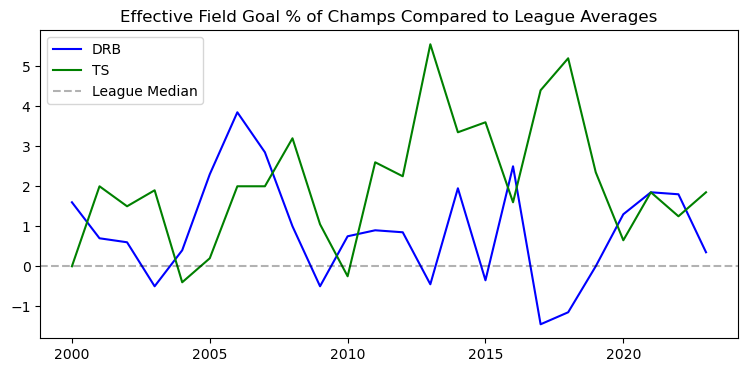

In [15]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['ORB%']
y2 = winners['DRB%']
y3 = winners['TS%']*100
y4 = modeling[['ORB%','DRB%','TS%','Year']].groupby(by='Year').agg(['mean', 'median'])

#y2 = winners['eFG%']-winners['eFG%_1']

#plt.plot(x, np.array(y1)-np.array(y4[('ORB%',   'median')]), color='green', label='ORB')
plt.plot(x, np.array(y2)-np.array(y4[('DRB%',   'median')]), color='blue', label='DRB')
plt.plot(x, np.array(y3)-np.array(y4[('TS%',   'median')])*100, color='green', label='TS')


plt.axhline(y=0, color='black', linestyle='--', alpha=0.3, label='League Median')
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

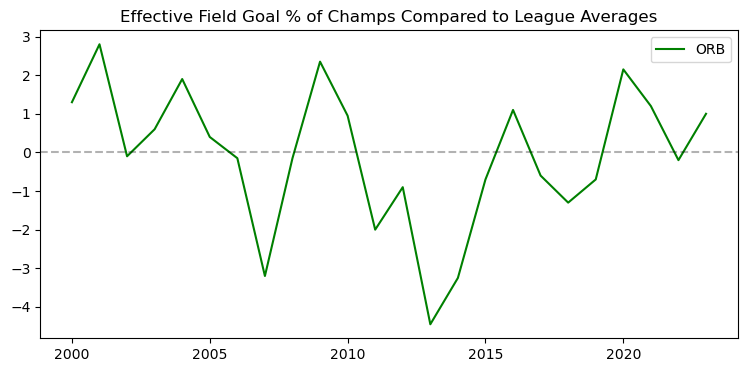

In [16]:
plt.figure(figsize=(9,4))
x = winners['Year']

y1 = winners['ORB%']
y2 = modeling[['ORB%','Year']].groupby(by='Year').agg('median')


plt.plot(x, np.array(y1)-np.array(y2['ORB%']), color='green', label='ORB')

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.title('Effective Field Goal % of Champs Compared to League Averages')

plt.legend()
plt.show()

# 4. Modeling<a id='4'></a>
[(Back to Top)](#top)

In [17]:
modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                715 non-null    object 
 1   Year                715 non-null    int64  
 2   G                   715 non-null    float64
 3   Age                 715 non-null    float64
 4   W                   715 non-null    float64
 5   MOV                 715 non-null    float64
 6   SOS                 715 non-null    float64
 7   SRS                 715 non-null    float64
 8   NRtg                715 non-null    float64
 9   Pace                715 non-null    float64
 10  3PAr                715 non-null    float64
 11  TS%                 715 non-null    float64
 12  eFG%                715 non-null    float64
 13  TOV%                715 non-null    float64
 14  ORB%                715 non-null    float64
 15  eFG%_1              715 non-null    float64
 16  TOV%_1  

In [18]:
finals = modeling.copy()
finals.query('Year >= 2015', inplace=True)
finals['Champs'] = np.where(finals['Round Finished']==5, 1, 0)
finals['Champs'].value_counts()

0    261
1      9
Name: Champs, dtype: int64

In [19]:
def add_noise(x):
    if isinstance(x, float):
        # Sample noise from a normal distribution with mean=x and std=0.01*x
        noise = np.random.normal(x, abs(0.01 * x))
        return round(noise, 3)
    else:
        return x

# Apply noise to each entry in the DataFrame
# noisy_df = df.applymap(add_noise)

In [20]:
needed = np.diff(finals['Champs'].value_counts())[0]*-1 # num of more non winners than champs
noised = finals.query('Champs==1').sample(needed, replace=True, ignore_index=True)
noised = noised.applymap(add_noise)
finals['Synthetic'] = False
noised['Synthetic'] = True
df = pd.concat([finals, noised], ignore_index=True)
df[['Champs','Synthetic']].value_counts()

Champs  Synthetic
0       False        261
1       True         252
        False          9
dtype: int64

In [21]:
y = df['Champs']
X = df.drop(['Team','Year','Round Finished','Champs','Synthetic'], axis=1)
X

,G,Age,W,MOV,SOS,SRS,NRtg,Pace,3PAr,TS%,eFG%,TOV%,ORB%,eFG%_1,TOV%_1,DRB%,TOV_szn_per100poss,PF_szn_per100poss
0,82.000,27.800,60.000,5.430,-0.680,4.750,5.800,93.900,0.321,0.563,0.527,13.500,21.400,0.492,14.900,73.400,15.100,18.900
1,82.000,25.000,40.000,0.160,-0.560,-0.400,0.200,95.800,0.280,0.523,0.489,12.500,24.700,0.494,13.700,75.000,14.300,21.900
2,82.000,28.600,38.000,-2.880,-0.250,-3.130,-3.000,92.700,0.240,0.529,0.491,13.000,23.900,0.506,12.900,73.700,14.700,20.500
3,82.000,26.000,33.000,-3.170,-0.270,-3.440,-3.400,93.000,0.226,0.498,0.456,11.200,22.100,0.487,12.000,79.300,12.700,19.400
4,82.000,28.800,50.000,3.000,-0.460,2.540,3.200,92.800,0.269,0.536,0.489,12.900,27.000,0.473,11.300,74.400,14.900,19.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,83.076,26.536,52.140,3.366,-0.292,3.038,3.376,97.219,0.361,0.604,0.572,13.249,25.042,0.543,12.252,76.443,14.861,18.844
518,80.746,29.157,58.911,6.031,-0.192,5.815,6.049,99.890,0.340,0.597,0.568,14.261,20.759,0.495,12.574,76.086,15.835,19.649
519,83.071,28.315,56.708,5.938,-0.547,5.486,6.377,92.488,0.357,0.549,0.526,12.763,24.960,0.498,12.679,77.718,14.431,21.637
520,81.447,26.708,58.648,6.010,-0.597,5.493,6.004,100.673,0.374,0.578,0.543,12.553,21.747,0.521,13.169,77.344,13.959,20.489


In [26]:
from sklearn.model_selection import KFold


def KFolds(X, y, model, loss_func, num_folds=5):
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        scores.append(loss_func(y_test, model.predict(X_test)))
    return np.mean(scores)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

classification_models = [LogisticRegression(), RandomForestClassifier(),
                        XGBClassifier()]

# Define metrics functions
metrics_functions = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
    'AUROC': roc_auc_score,
    'AUPRC': average_precision_score
}

def evaluate_model(X, y, model, metrics):
    model.fit(X, y)
    y_pred = model.predict(X)
    results = {}
    for metric_name, metric_func in metrics.items():
        if metric_name in ['AUROC', 'AUPRC']:
            if metric_name == 'AUROC':
                score = roc_auc_score(y, model.predict_proba(X)[:, 1])
            else:
                score = average_precision_score(y, model.predict_proba(X)[:, 1])
        else:
            score = metric_func(y, y_pred)
        results[metric_name] = score
    return results

def test_base_models(X, y):
    for model in classification_models:
        results = evaluate_model(X, y, model, metrics_functions)
        print(f"Model: {type(model).__name__}")
        for metric_name, score in results.items():
            print(f"{metric_name}: {score:.4f}")
        print()

test_base_models(X, y)


/Users/alexbradshaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9310
Precision: 0.8814
Recall: 0.9962
F1-score: 0.9353
AUROC: 0.9520
AUPRC: 0.9158

Model: RandomForestClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUROC: 1.0000
AUPRC: 1.0000

Model: XGBClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUROC: 1.0000
AUPRC: 1.0000



In [27]:
import torch
import torch.nn as nn
import torch.optim as optim


class FeedforwardNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, hidden_functions, output_size):
        super(FeedforwardNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.functions = hidden_functions
        self.criterion = torch.nn.CrossEntropyLoss()

        # Creates layers
        self.layers = nn.ModuleList()
        prev_size = self.input_size
        for i, size in enumerate(hidden_sizes):
            self.layers.append(nn.Linear(prev_size, size))
            if i < len(hidden_functions):
                self.layers.append(nn.Sequential(hidden_functions[i]))
            prev_size = size
        self.layers.append(nn.Linear(prev_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def fit(self, X, y, learning_rate, epochs, p=True):
        # Ensure dtypes are usable
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)

        # Calculate min and max values of X
        X_min = torch.min(X, dim=0).values
        X_max = torch.max(X, dim=0).values

        # Min-Max scaling to bring all columns within the range 0-1
        X = (X - X_min) / (X_max - X_min)
        
        # Define loss and optimizer
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calculate loss
            loss = self.criterion(output, y)

            # Backpropagation
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Print the loss every 10% epochs
            if(p):
                if epoch % epochs/10 == epochs/10-1:
                    print(f"Epoch {epoch+1}: Loss = {loss.item():.8f}")
        return round(loss.item(), 5)

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        probabilities = nn.functional.softmax(output, dim=1)
        return probabilities.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        _, predicted_classes = torch.max(output, dim=1)
        return predicted_classes.detach().numpy()

    def check_CE_loss(self, X, y):
        probabilities = self.predict_proba(X)
        loss = self.criterion(torch.tensor(probabilities, dtype=torch.float32), y)
        loss.backward()
        return round(loss.item(), 5)

    def check_accuracy(self, X, y):
        classes = self.predict(torch.tensor(X, dtype=torch.float32))
        check = classes == y
        missed = sum(check)
        length = len(check)
        print(f"{missed}/{length}")
        return missed/length

In [28]:
def KFold(df, folds=5, window_size=10, learning_rate=0.01, epochs=100):
    losses = []
    for year in range(2022, 2022-folds, -1):
        train = df[(df['Year'] < year) & (df['Year'] >= year-window_size)]
        val = df[(df['Year'] == year) & (df['Synthetic'] == True)]
        X_train = train.drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1).values
        Y_train = train['Round Finished'].values

        X_val = val.drop(['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
        Y_val = val['Round Finished']

        X_val = torch.tensor(X_val.values, dtype=torch.float64)
        Y_val = torch.tensor(Y_val.values, dtype=torch.int64)
        # funcs: F.relu, nn.sigmoid, torch.matmul

        model = FeedforwardNetwork(X_train.shape[1], hidden_sizes=[1000, 500,500,500,500,500],
                           hidden_functions=[nn.ReLU()],
                           output_size=6)
        losses.append(model.fit(X_train, Y_train, learning_rate, epochs, False))
    return round(np.mean(losses), 4), model

# TODO:
Documentation
Training, validation, test split
Try NN
Feature Importance


In [ ]:
df = pd.read_csv('./df_w_noise.csv', index_col='Unnamed: 0')
#df['Round Finished'] = df['Round Finished'].map({0:0, 1:0, 2:0, 3:0, 4:1, 5:1})
train = df[df['Year']!=2023].reset_index(drop=True)
test = df[(df['Year']==2023) & (df['Synthetic']==False)].reset_index(drop=True)


In [ ]:
loss, model = KFold(train, learning_rate=0.01, epochs=100,
                    folds=5, window_size=10)
loss

In [ ]:
model.predict(test.drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1).values)

In [ ]:
combined['Round Finished'].value_counts()

In [ ]:
X_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)].drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
Y_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)]['Round Finished']
X_test

In [ ]:
model.predict(X_test.values)

In [ ]:
losses = []
for i, data in enumerate([full, combined]):
    for windows in range(3, 18):
        for lr in [0.1, 0.01]:
            for epochs in [50, 100]:
                params = [i, windows, lr, epochs]
                loss = KFold(data, learning_rate=lr, epochs=epochs, window_size=windows)[0]
                params += ([loss])
                losses.append(params)

In [ ]:
list(losses)

In [ ]:
losses = np.array(losses)
losses = losses[losses[:, 4].argsort()]
for i in range(4):
    plt.plot(losses[:15,4], losses[:15,1])

In [ ]:
import pandas as pd

def drop_highly_correlated_columns(df, threshold=0.9):
    # Compute the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated columns
    mask = corr_matrix >= threshold

    # Exclude diagonal and lower triangle of the correlation matrix
    mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))

    # Get the names of highly correlated columns
    drop_cols = [column for column in mask.columns if any(mask[column])]

    # Drop the highly correlated columns from the DataFrame
    df_filtered = df.drop(columns=drop_cols)

    return df_filtered


In [ ]:
testing = combined.copy()
mask = testing.corr().abs() >= 0.8
mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))
drop_cols = [mask[column].sum() for column in mask.columns if any(mask[column])]
drop_cols

In [ ]:
full.corr().abs()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('./df_no_noise.csv')
df['Round Finished'].value_counts()

In [ ]:
X, y = df.drop('Round Finished', axis=1), df['Round Finished']

In [ ]:
train = df[df['Year']!=2023]
test = df[(df['Year']==2023) & (df['Synthetic']==False)]
train.shape, test.shape

In [ ]:
train.info()

In [ ]:
model = RandomForestClassifier()
model.fit(train.drop(['Unnamed: 0','Team','Year','Round Finished'], axis=1), train['Round Finished'])

In [ ]:
probs = model.predict_proba(test.drop(['Unnamed: 0','Team','Year','Round Finished'], axis=1))
probs

In [ ]:
test['Team'].iloc[np.argmax(probs, axis=0)]

[Back to Top](#top)